In [0]:
%matplotlib inline
from fastai.basics import *

In [23]:
!curl https://course.fast.ai/setup/colab | bash


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    981      0 --:--:-- --:--:-- --:--:--   981
Updating fastai...
Done.


In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2);x

In [0]:
x[:,0].uniform_(-1,1)

tensor([ 0.0839,  0.1869, -0.9314, -0.2842, -0.9894, -0.5684,  0.3942,  0.2391,
        -0.9791, -0.5910, -0.7660, -0.2343,  0.6383, -0.5744,  0.8569,  0.5593,
         0.8124, -0.3287, -0.1229,  0.9795,  0.3956,  0.6966, -0.5834, -0.9047,
         0.9327, -0.3404, -0.3187, -0.9267,  0.3238, -0.1788, -0.6482, -0.7137,
         0.4598, -0.0820, -0.5767, -0.0954,  0.4161, -0.7369,  0.0978,  0.0675,
        -0.4282,  0.7664, -0.4916,  0.9090, -0.4629,  0.4055, -0.8016, -0.3845,
        -0.2909, -0.5743, -0.1124, -0.1203,  0.4708,  0.1201, -0.0807, -0.3692,
        -0.6776,  0.8276,  0.0014,  0.9936, -0.3893,  0.8292,  0.7201,  0.3888,
         0.9698, -0.1906, -0.0970, -0.2859, -0.9094, -0.7677,  0.1895, -0.4378,
        -0.8126,  0.0200, -0.1205,  0.1118,  0.2309, -0.7484,  0.7984, -0.1801,
        -0.9899, -0.9915, -0.9100, -0.2029,  0.0895,  0.8908,  0.8684, -0.5516,
         0.7264,  0.8255, -0.0538, -0.6600,  0.6019,  0.6629, -0.9059, -0.5553,
        -0.7942, -0.6290,  0.6021, -0.04

In [58]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3642,  1.0000],
        [ 0.4998,  1.0000],
        [ 0.6690,  1.0000],
        [-0.9000,  1.0000],
        [-0.1624,  1.0000]])

In [0]:
y = x@a + torch.rand(n)

In [60]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

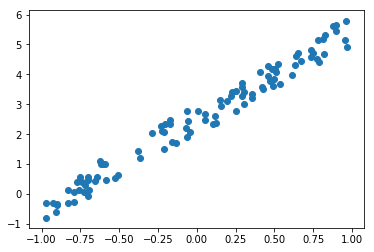

In [62]:
plt.scatter(x[:,0],y)

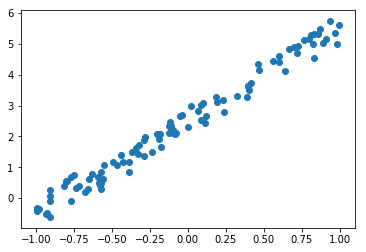

In [0]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y):return ((y-y_hat)**2).mean()

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [29]:
y_hat = x@a
mse(y_hat, y)

NameError: ignored

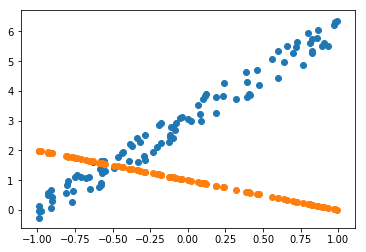

In [30]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  loss.backward(retain_graph=True)
  
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [65]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

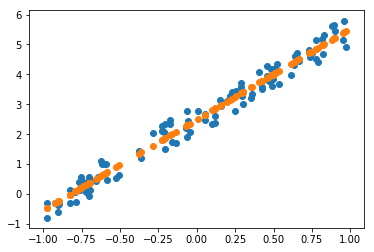

In [68]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [70]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.